In [66]:
!pip install prophet

In [67]:
# !pip install tensorflow

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
df = pd.read_csv(r"C:\Users\ejanv\Downloads\RTD Self-Scheduled Nominations\consolidated_csv_selfsched_01GIGSOL_G01.csv")

In [70]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.set_index('RUN_TIME')
df.head()

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
2021-07-05 05:55:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:00:00 AM,07/05/2021 05:55:00 AM,07/05/2021 06:00:00 AM,GIGASOL3,0.1,NaN
2021-07-05 05:55:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:00:00 AM,07/05/2021 05:55:00 AM,07/05/2021 06:00:00 AM,GIGASOL3,0.1,NaN
2021-07-05 06:00:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:05:00 AM,07/05/2021 06:00:00 AM,07/05/2021 06:05:00 AM,GIGASOL3,0.5,NaN
2021-07-05 06:00:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:05:00 AM,07/05/2021 06:00:00 AM,07/05/2021 06:05:00 AM,GIGASOL3,0.5,NaN
2021-07-05 06:05:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:10:00 AM,07/05/2021 06:05:00 AM,07/05/2021 06:10:00 AM,GIGASOL3,0.9,NaN


In [71]:
duplicate_labels = df.index[df.index.duplicated()]
print("Duplicate Labels:", duplicate_labels)

Duplicate Labels: DatetimeIndex(['2021-07-05 05:55:00', '2021-07-05 06:00:00',
               '2021-07-05 06:05:00', '2021-07-05 06:10:00',
               '2021-07-05 06:15:00', '2021-07-05 06:20:00',
               '2021-07-05 06:25:00', '2021-07-05 06:30:00',
               '2021-07-05 06:35:00', '2021-07-05 06:40:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='RUN_TIME', length=1869, freq=None)


In [72]:
df = df[~df.index.duplicated(keep='first')]
df

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
2021-07-05 05:55:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:00:00 AM,07/05/2021 05:55:00 AM,07/05/2021 06:00:00 AM,GIGASOL3,0.1,NaN
2021-07-05 06:00:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:05:00 AM,07/05/2021 06:00:00 AM,07/05/2021 06:05:00 AM,GIGASOL3,0.5,NaN
2021-07-05 06:05:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:10:00 AM,07/05/2021 06:05:00 AM,07/05/2021 06:10:00 AM,GIGASOL3,0.9,NaN
2021-07-05 06:10:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:15:00 AM,07/05/2021 06:10:00 AM,07/05/2021 06:15:00 AM,GIGASOL3,1.4,NaN
2021-07-05 06:15:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,07/05/2021 06:20:00 AM,07/05/2021 06:15:00 AM,07/05/2021 06:20:00 AM,GIGASOL3,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-25 23:35:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,09/25/2023 11:40:00 PM,09/25/2023 11:35:00 PM,09/25/2023 11:40:00 PM,GIGASOL3,0.0,NaN
2023-09-25 23:40:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,09/25/2023 11:45:00 PM,09/25/2023 11:40:00 PM,09/25/2023 11:45:00 PM,GIGASOL3,0.0,NaN
2023-09-25 23:45:00,RTD,CLUZ,NLUZON,01GIGSOL_G01,09/25/2023 11:50:00 PM,09/25/2023 11:45:00 PM,09/25/2023 11:50:00 PM,GIGASOL3,0.0,NaN


In [73]:
data = df[['SELF_SCHED_MW']]
data = data.asfreq(freq='5T') # Add to complete dates
data

,SELF_SCHED_MW
RUN_TIME,
2021-07-05 05:55:00,0.1
2021-07-05 06:00:00,0.5
2021-07-05 06:05:00,0.9
2021-07-05 06:10:00,1.4
2021-07-05 06:15:00,2.0
...,...
2023-09-25 23:35:00,0.0
2023-09-25 23:40:00,0.0
2023-09-25 23:45:00,0.0


In [74]:
data1 = data.copy()
data1['Date'] = data.index.date
data1

,SELF_SCHED_MW,Date
RUN_TIME,,
2021-07-05 05:55:00,0.1,2021-07-05
2021-07-05 06:00:00,0.5,2021-07-05
2021-07-05 06:05:00,0.9,2021-07-05
2021-07-05 06:10:00,1.4,2021-07-05
2021-07-05 06:15:00,2.0,2021-07-05
...,...,...
2023-09-25 23:35:00,0.0,2023-09-25
2023-09-25 23:40:00,0.0,2023-09-25
2023-09-25 23:45:00,0.0,2023-09-25


In [75]:
max_quantity_per_day = data1.groupby('Date')['SELF_SCHED_MW'].max()
data_max = pd.DataFrame(max_quantity_per_day).reset_index()
data_max

,Date,SELF_SCHED_MW
0,2021-07-05,35.5
1,2021-07-06,50.0
2,2021-07-07,49.7
3,2021-07-08,4.0
4,2021-07-09,50.7
...,...,...
808,2023-09-21,48.3
809,2023-09-22,41.8
810,2023-09-23,25.1
811,2023-09-24,39.0


In [76]:
data_max = data_max.set_index('Date')
data_max.head()

,SELF_SCHED_MW
Date,
2021-07-05,35.5
2021-07-06,50.0
2021-07-07,49.7
2021-07-08,4.0
2021-07-09,50.7


<Axes: xlabel='RUN_TIME'>

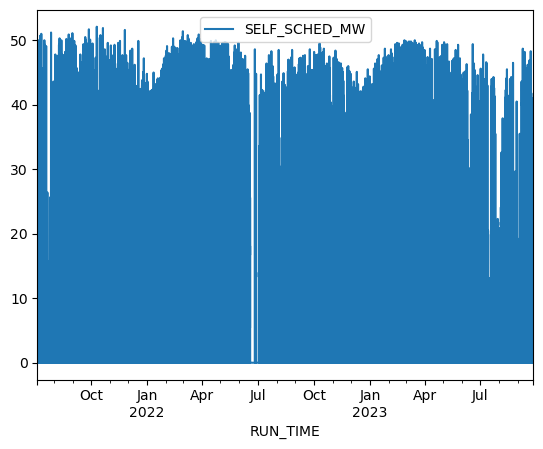

In [77]:
data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
data[['SELF_SCHED_MW']].plot()


<Axes: xlabel='Date'>

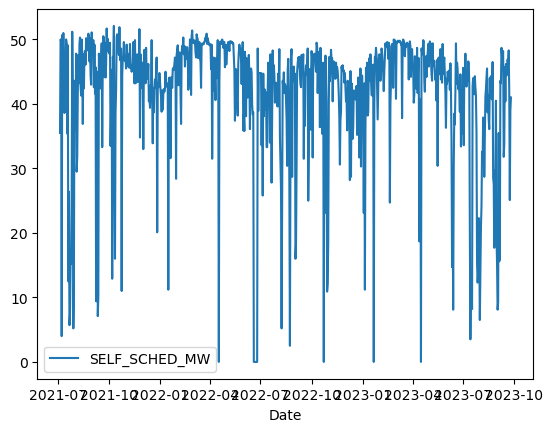

In [78]:
data_max['SELF_SCHED_MW'] = data_max['SELF_SCHED_MW'].fillna(method='ffill')
data_max[['SELF_SCHED_MW']].plot()


In [79]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

In [80]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_max)

(0.01, False)

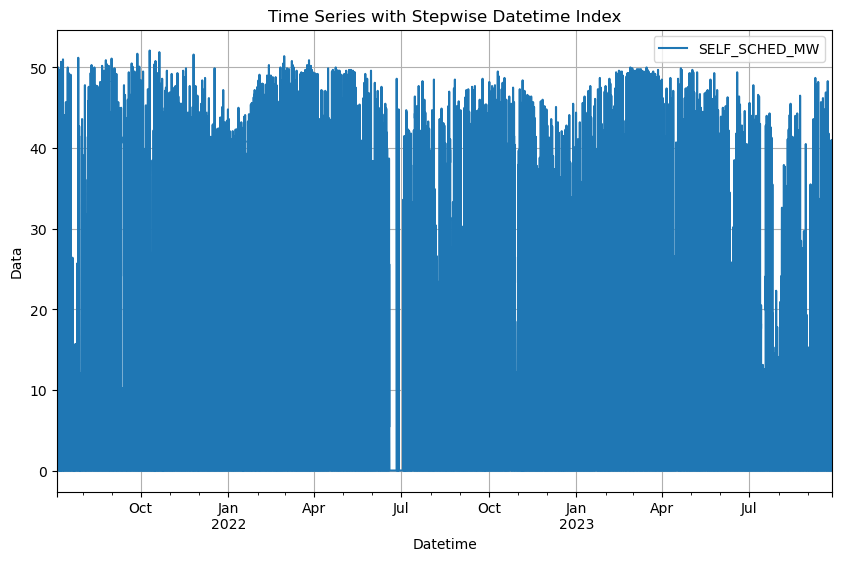

In [81]:
# Plot the time series while preserving the stepwise format
data.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

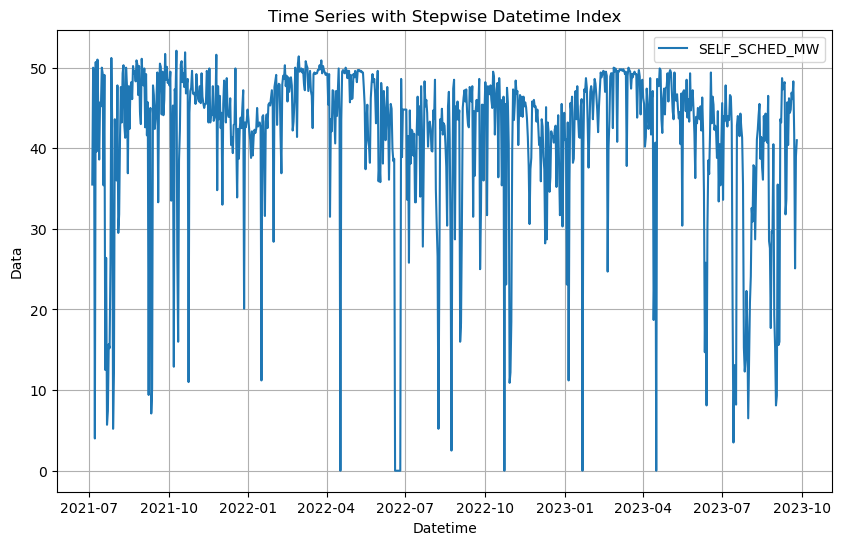

In [82]:
# Plot the time series while preserving the stepwise format
data_max.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

## Trial Prophet

## LSTM trial

# Prophet

In [50]:
data.reset_index(inplace=True)
data = data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
data

,ds,y
0,2021-07-05 05:55:00,0.1
1,2021-07-05 06:00:00,0.5
2,2021-07-05 06:05:00,0.9
3,2021-07-05 06:10:00,1.4
4,2021-07-05 06:15:00,2.0
...,...,...
234068,2023-09-25 23:35:00,0.0
234069,2023-09-25 23:40:00,0.0
234070,2023-09-25 23:45:00,0.0
234071,2023-09-25 23:50:00,0.0


In [51]:
data_max.reset_index(inplace=True)
data_max = data_max.rename(columns={'Date': 'ds', 'SELF_SCHED_MW': 'y'})
data_max

,ds,y
0,2021-07-05,35.5
1,2021-07-06,50.0
2,2021-07-07,49.7
3,2021-07-08,4.0
4,2021-07-09,50.7
...,...,...
808,2023-09-21,48.3
809,2023-09-22,41.8
810,2023-09-23,25.1
811,2023-09-24,39.0


In [52]:
from prophet import Prophet

# Initialize the model
model1 = Prophet()

# Fit the model to your data
model1.fit(data)

08:28:20 - cmdstanpy - INFO - Chain [1] start processing
08:32:33 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# Initialize the model
model2 = Prophet()

# Fit the model to your data
model2.fit(data_max)

08:32:35 - cmdstanpy - INFO - Chain [1] start processing
08:32:36 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future_dates1 = model1.make_future_dataframe(periods=30)
future_dates1.tail()

,ds
234098,2023-10-21 23:55:00
234099,2023-10-22 23:55:00
234100,2023-10-23 23:55:00
234101,2023-10-24 23:55:00
234102,2023-10-25 23:55:00


In [55]:
future_dates2 = model1.make_future_dataframe(periods=30)
future_dates2.tail()

,ds
234098,2023-10-21 23:55:00
234099,2023-10-22 23:55:00
234100,2023-10-23 23:55:00
234101,2023-10-24 23:55:00
234102,2023-10-25 23:55:00


In [56]:
forecast1 = model1.predict(future_dates1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234098,2023-10-21 23:55:00,-2.071295,-11.550475,6.702152
234099,2023-10-22 23:55:00,-1.966677,-10.920190,6.803151
234100,2023-10-23 23:55:00,-1.442889,-10.467100,6.788499
234101,2023-10-24 23:55:00,-0.952912,-10.014239,7.640442
234102,2023-10-25 23:55:00,-0.985994,-9.330639,8.532318


In [57]:
forecast2 = model2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234098,2023-10-21 23:55:00,35.498268,24.737229,48.073877
234099,2023-10-22 23:55:00,37.518348,26.769921,49.730219
234100,2023-10-23 23:55:00,37.901644,26.372774,48.778246
234101,2023-10-24 23:55:00,39.587135,28.201852,50.566292
234102,2023-10-25 23:55:00,37.684076,26.540189,50.420683


In [58]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-05 05:55:00,8.315889,-10.792605,6.277153,8.315889,8.315889,-9.930910,-9.930910,-9.930910,-9.481771,...,-0.233735,-0.233735,-0.233735,-0.215404,-0.215404,-0.215404,0.0,0.0,0.0,-1.615021
1,2021-07-05 06:00:00,8.316127,-10.087052,6.995797,8.316127,8.316127,-9.606224,-9.606224,-9.606224,-9.158899,...,-0.232315,-0.232315,-0.232315,-0.215010,-0.215010,-0.215010,0.0,0.0,0.0,-1.290097
2,2021-07-05 06:05:00,8.316364,-9.430859,7.647522,8.316364,8.316364,-9.254415,-9.254415,-9.254415,-8.808901,...,-0.230897,-0.230897,-0.230897,-0.214617,-0.214617,-0.214617,0.0,0.0,0.0,-0.938051
3,2021-07-05 06:10:00,8.316601,-9.197361,6.971505,8.316601,8.316601,-8.875398,-8.875398,-8.875398,-8.431692,...,-0.229482,-0.229482,-0.229482,-0.214224,-0.214224,-0.214224,0.0,0.0,0.0,-0.558797
4,2021-07-05 06:15:00,8.316838,-8.599218,8.871946,8.316838,8.316838,-8.469196,-8.469196,-8.469196,-8.027296,...,-0.228069,-0.228069,-0.228069,-0.213831,-0.213831,-0.213831,0.0,0.0,0.0,-0.152358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234098,2023-10-21 23:55:00,11.290741,-11.550475,6.702152,10.379936,12.230097,-13.362036,-13.362036,-13.362036,-10.988680,...,-0.260127,-0.260127,-0.260127,-2.113229,-2.113229,-2.113229,0.0,0.0,0.0,-2.071295
234099,2023-10-22 23:55:00,11.299376,-10.920190,6.803151,10.324318,12.298151,-13.266053,-13.266053,-13.266053,-10.988680,...,-0.337301,-0.337301,-0.337301,-1.940072,-1.940072,-1.940072,0.0,0.0,0.0,-1.966677
234100,2023-10-23 23:55:00,11.308012,-10.467100,6.788499,10.253160,12.358781,-12.750901,-12.750901,-12.750901,-10.988680,...,-0.005986,-0.005986,-0.005986,-1.756235,-1.756235,-1.756235,0.0,0.0,0.0,-1.442889
234101,2023-10-24 23:55:00,11.316647,-10.014239,7.640442,10.197847,12.477175,-12.269558,-12.269558,-12.269558,-10.988680,...,0.285175,0.285175,0.285175,-1.566053,-1.566053,-1.566053,0.0,0.0,0.0,-0.952912


In [59]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-05 05:55:00,44.235823,29.943790,53.244455,44.235823,44.235823,-2.511848,-2.511848,-2.511848,-0.086329,-0.086329,-0.086329,-2.425519,-2.425519,-2.425519,0.0,0.0,0.0,41.723975
1,2021-07-05 06:00:00,44.235805,29.860492,53.394636,44.235805,44.235805,-2.511736,-2.511736,-2.511736,-0.087087,-0.087087,-0.087087,-2.424649,-2.424649,-2.424649,0.0,0.0,0.0,41.724069
2,2021-07-05 06:05:00,44.235788,29.958187,53.105802,44.235788,44.235788,-2.511647,-2.511647,-2.511647,-0.087867,-0.087867,-0.087867,-2.423780,-2.423780,-2.423780,0.0,0.0,0.0,41.724141
3,2021-07-05 06:10:00,44.235770,30.584707,53.613699,44.235770,44.235770,-2.511579,-2.511579,-2.511579,-0.088666,-0.088666,-0.088666,-2.422912,-2.422912,-2.422912,0.0,0.0,0.0,41.724191
4,2021-07-05 06:15:00,44.235752,29.372594,52.462777,44.235752,44.235752,-2.511533,-2.511533,-2.511533,-0.089487,-0.089487,-0.089487,-2.422046,-2.422046,-2.422046,0.0,0.0,0.0,41.724220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234098,2023-10-21 23:55:00,39.566972,24.737229,48.073877,39.566482,39.567408,-4.068703,-4.068703,-4.068703,-1.921304,-1.921304,-1.921304,-2.147399,-2.147399,-2.147399,0.0,0.0,0.0,35.498268
234099,2023-10-22 23:55:00,39.561371,26.769921,49.730219,39.560879,39.561810,-2.043023,-2.043023,-2.043023,-0.115192,-0.115192,-0.115192,-1.927831,-1.927831,-1.927831,0.0,0.0,0.0,37.518348
234100,2023-10-23 23:55:00,39.555771,26.372774,48.778246,39.555275,39.556212,-1.654128,-1.654128,-1.654128,0.029274,0.029274,0.029274,-1.683402,-1.683402,-1.683402,0.0,0.0,0.0,37.901644
234101,2023-10-24 23:55:00,39.550171,28.201852,50.566292,39.549671,39.550614,0.036964,0.036964,0.036964,1.457936,1.457936,1.457936,-1.420972,-1.420972,-1.420972,0.0,0.0,0.0,39.587135


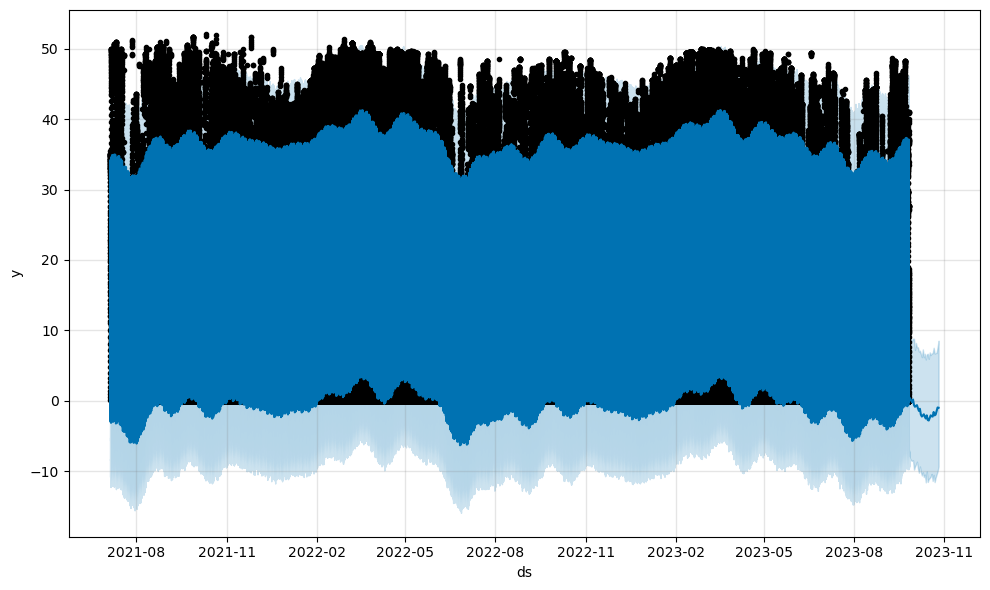

In [60]:
fig1 = model1.plot(forecast1)

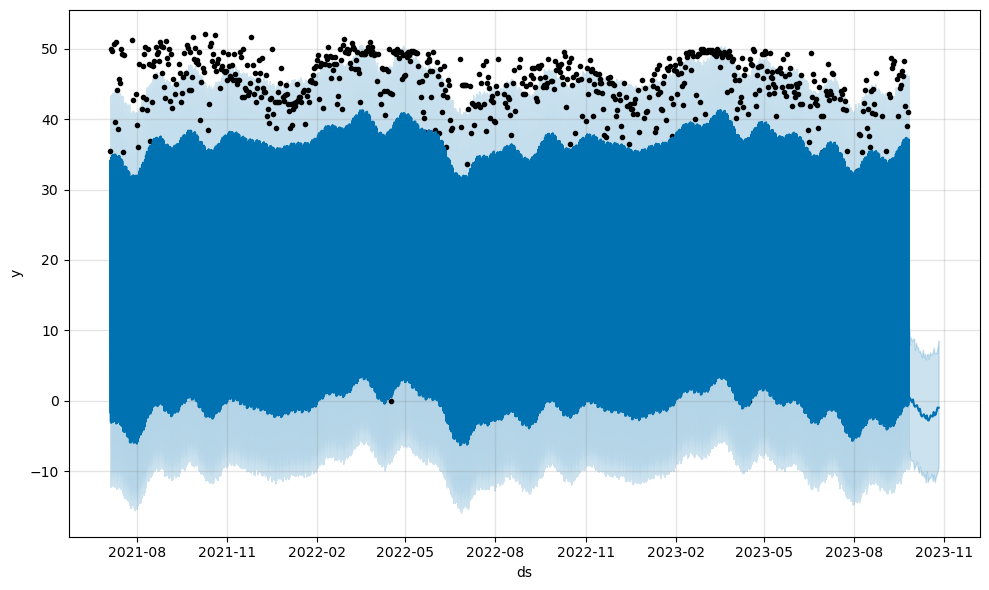

In [61]:
fig2 = model2.plot(forecast1)

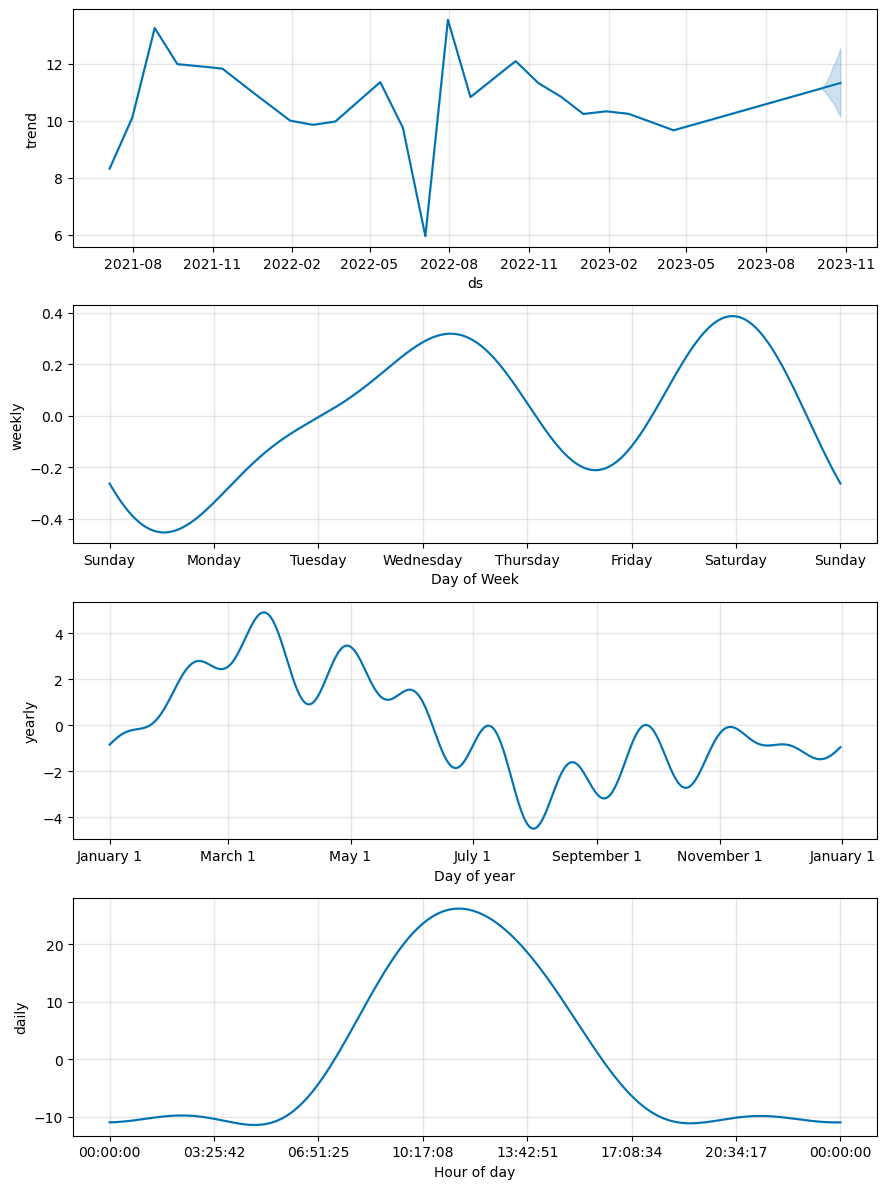

In [62]:
fig_components1 = model1.plot_components(forecast1)

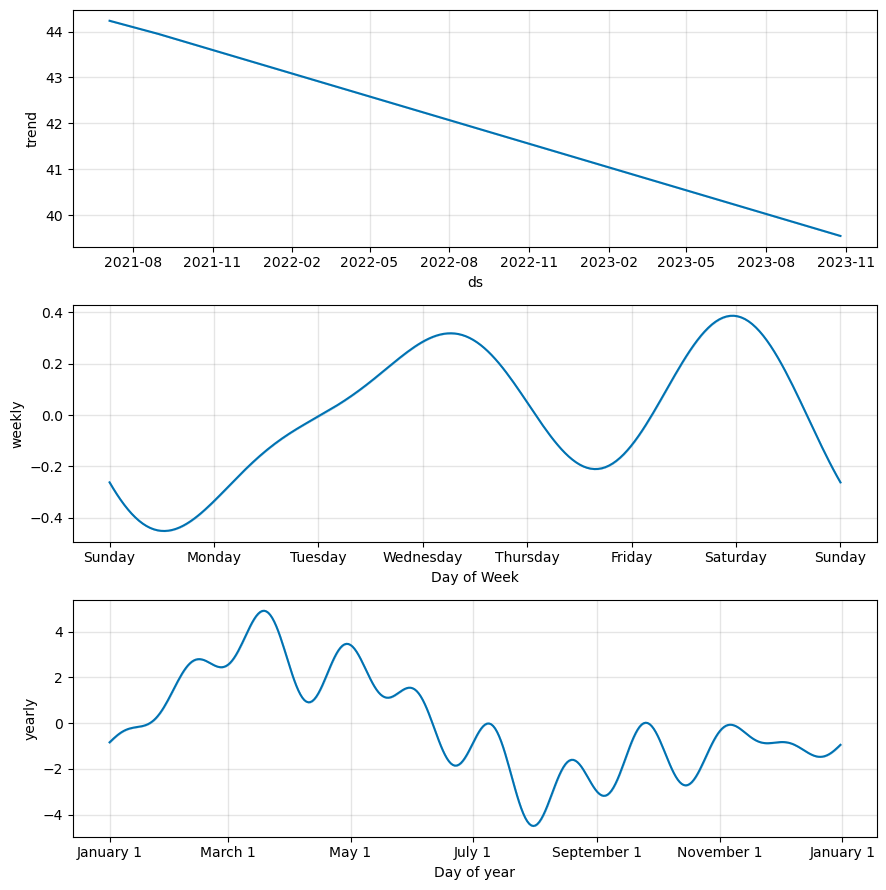

In [63]:
fig_components2 = model1.plot_components(forecast2)

In [64]:
data_max.head(20)

,ds,y
0,2021-07-05,35.5
1,2021-07-06,50.0
2,2021-07-07,49.7
3,2021-07-08,4.0
4,2021-07-09,50.7
5,2021-07-10,39.6
6,2021-07-11,51.0
7,2021-07-12,44.1
8,2021-07-13,38.6
9,2021-07-14,45.7


## Plotly Prophet

### Super long and usually lags if noob laptop

## Prophet with metrics 

# This part is the reference to Auto ARIMA model